# Exploratory Data Analysis

## Questions to Solve
* **Course Title**
    - What is the most frequent words in course title?
    - Longest/Shortest course title?
    - How can we build recommendation systems via title using similarity?
    - Most famous courses by number of subscribers?
* **Subjects/Categories**
    - What is the distribution of subjects?
    - How many courses per subject?
    - Distribution of subjects per year?
    - How many people purchase a particular subject?
    - Which subjects is the most popular?
* **Published Year**
    - Number of courses per year?
    - Which year has the highest number of courses?
    - What is the trend of courses per year?
* **Levels**
    - How many levels do we have?
    - What is the distribution of courses per level?
    - Which subject have the highest levels?
    - How many subscribers per level?
    - How many courses per level?
* **Duration of Course**
    - Which courses have the highest duration (paid and free)?
    - Which courses have higher durations?
    - Duration vs number of subscribers?
* **Subscribers**
    - Which course have the highest number of subscribers?
    - Average number of subscribers?
    - Number of subscribers per subject?
    - Number of subscribers per year?
* **Price**
    - What is the average price of a course?
    - What is the minimum and maximum price?
    - How much does Udemy earn?
    - The most profitable courses?
* **Correlation**
    - Does number of subscribers depend on;
        - Number of reviews?
        - Price?
        - Number of lectures?
        - Content duration?

In [1]:
# Import dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# read in / load dataset
df = pd.read_csv("udemy_course_data.csv")

# convert price from Rupee to Dollar
df["price"] = df["price"] * 0.0121

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,1.1495,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,2.4200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [3]:
# Get info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3683 non-null   int64  
 1   course_title         3683 non-null   object 
 2   url                  3683 non-null   object 
 3   is_paid              3683 non-null   bool   
 4   price                3683 non-null   float64
 5   num_subscribers      3683 non-null   int64  
 6   num_reviews          3683 non-null   int64  
 7   num_lectures         3683 non-null   int64  
 8   level                3683 non-null   object 
 9   content_duration     3683 non-null   object 
 10  published_timestamp  3683 non-null   object 
 11  subject              3683 non-null   object 
 12  profit               3683 non-null   int64  
 13  published_date       3683 non-null   object 
 14  published_time       3682 non-null   object 
 15  year                 3683 non-null   i

## EDA on Subject/Category

* **Subjects/Categories**
    - What is the distribution of subjects?
    - How many courses per subject?
    - Distribution of subjects per year?
    - How many people purchase a particular subject?
    - Which subjects is the most popular?
    
**What is the distribution of subjects?**    

In [4]:
len(df["course_title"].unique())

3668

There are 3683 unique number of courses in the dataset.

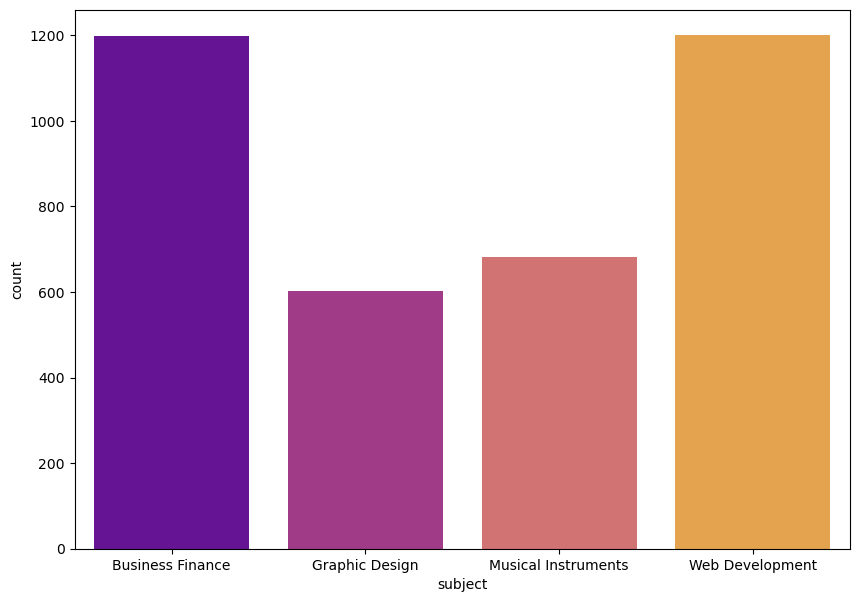

In [5]:
# Plot he grap of subject/category of courses
plt.figure(figsize=(10, 7))
sns.countplot(x="subject", data=df, palette="plasma");

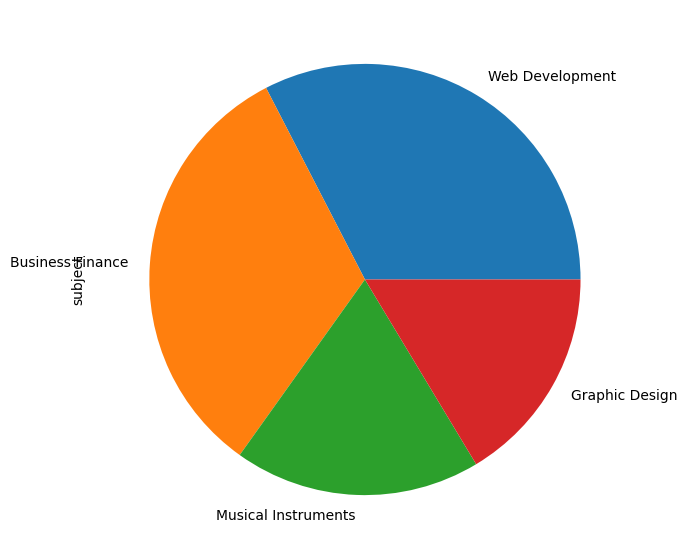

In [6]:
# plot a piechat of the "subject" column
plt.figure(figsize=(10, 7))
df["subject"].value_counts().plot(kind="pie");

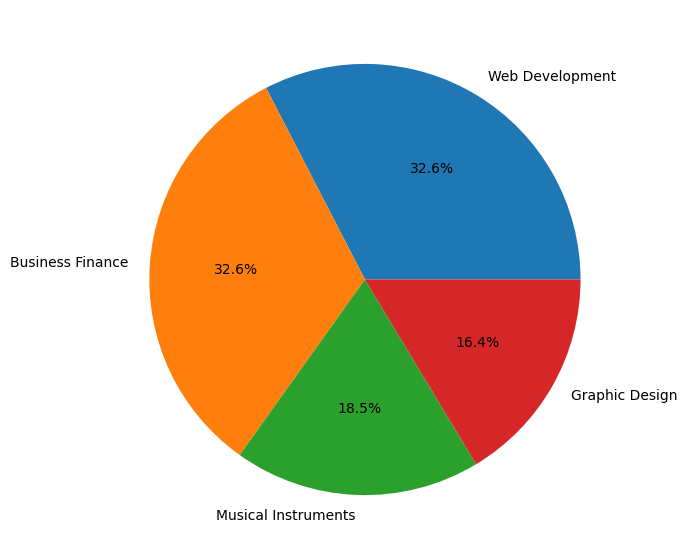

In [7]:
plt.figure(figsize=(10, 7))
plt.pie(df["subject"].value_counts(), 
        labels=df["subject"].value_counts().index, 
        autopct='%1.1f%%');

## EDA on Subscribers

* **Subscribers**
    - Which course have the highest number of subscribers?
    - Average number of subscribers?
    - Number of subscribers per subject?
    - Number of subscribers per year?

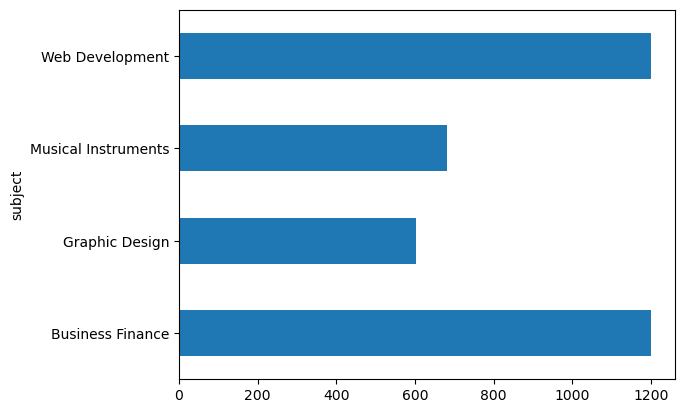

In [8]:
# Group number of subcribers by subject and get count
df.groupby("subject")["num_subscribers"].count().plot(kind="barh");

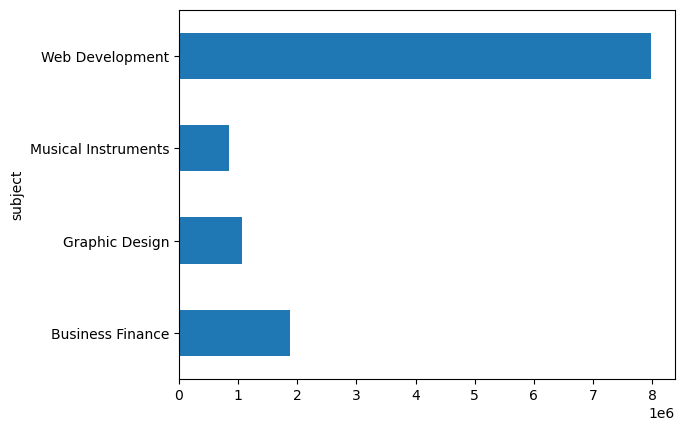

In [9]:
# Group number of subscribers by subject and get sum
df.groupby("subject")["num_subscribers"].sum().plot(kind="barh");

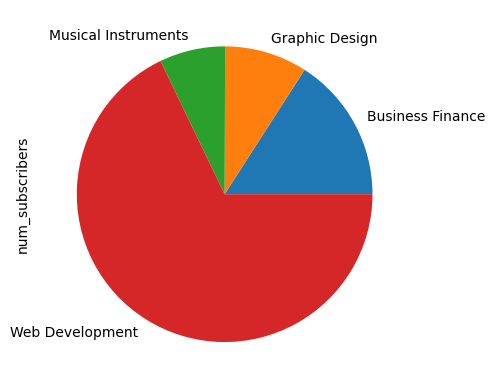

In [10]:
# pie chart of the number of subscribers per subject
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'pie');

## EDA on Levels

* **Levels**
    - How many levels do we have?
    - What is the distribution of courses per level?
    - Which subject have the highest levels?
    - How many subscribers per level?
    - How many courses per level?

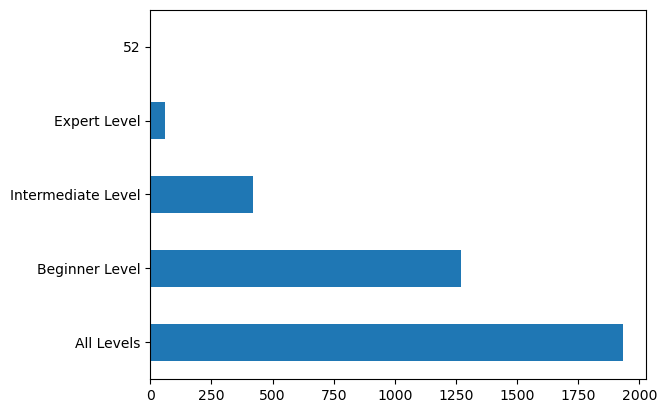

In [11]:
# Plot the count of categories of levels
df["level"].value_counts().plot(kind = "barh");

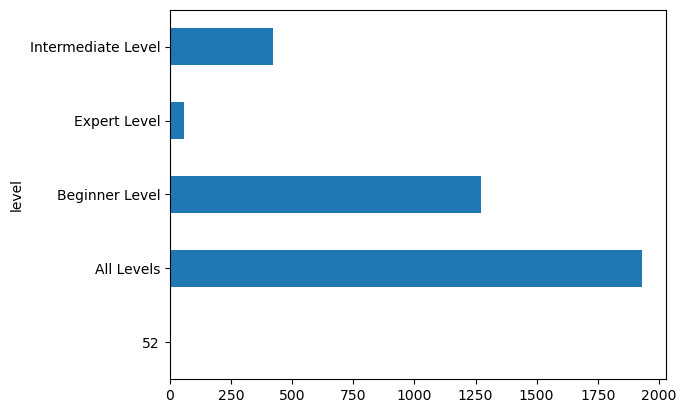

In [12]:
# Groupby levels for count of number of subscribers
df.groupby("level")["num_subscribers"].count().plot(kind="barh");

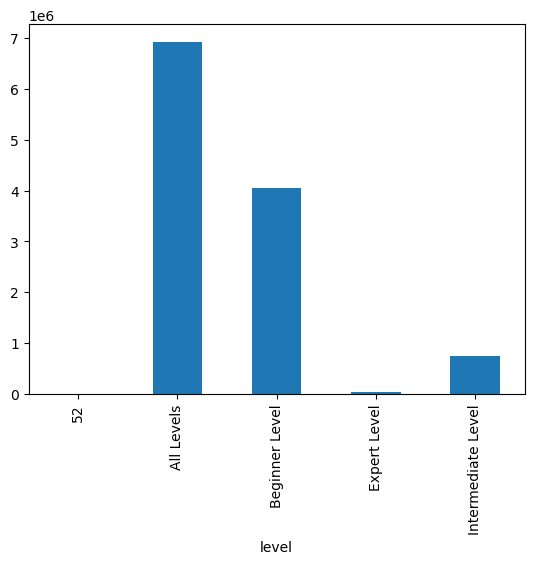

In [13]:
# groupby level for sum of number of subscribers
df.groupby("level")["num_subscribers"].sum().plot(kind="bar");

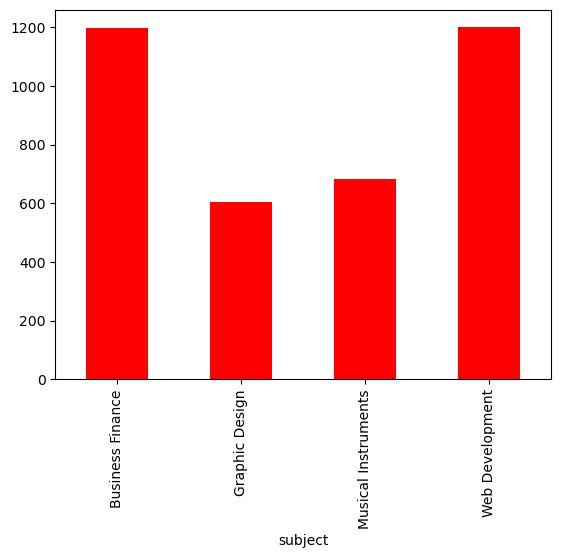

In [14]:
# plot the number of levels per subject
df.groupby("subject")["level"].count().plot(kind="bar", color="r");

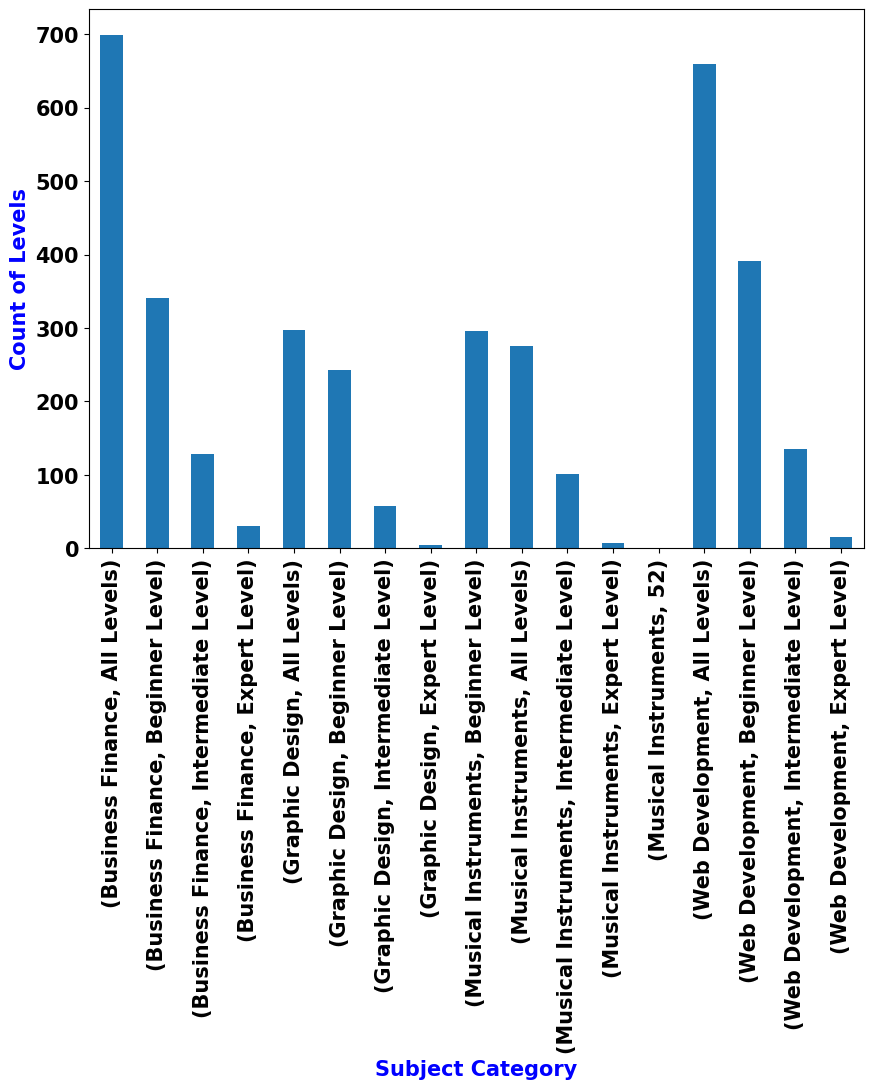

In [15]:
# Plot number of each level per subject category
plt.figure(figsize=(10, 7))
df.groupby(['subject'])['level'].value_counts().plot(kind = 'bar')
plt.xticks(fontsize = 15,fontweight = 'bold')
plt.yticks(fontsize = 15,fontweight = 'bold')
plt.xlabel('Subject Category',fontsize = 15,fontweight = 'bold',color = 'blue')
plt.ylabel('Count of Levels',fontsize = 15,fontweight = 'bold',color = 'blue');

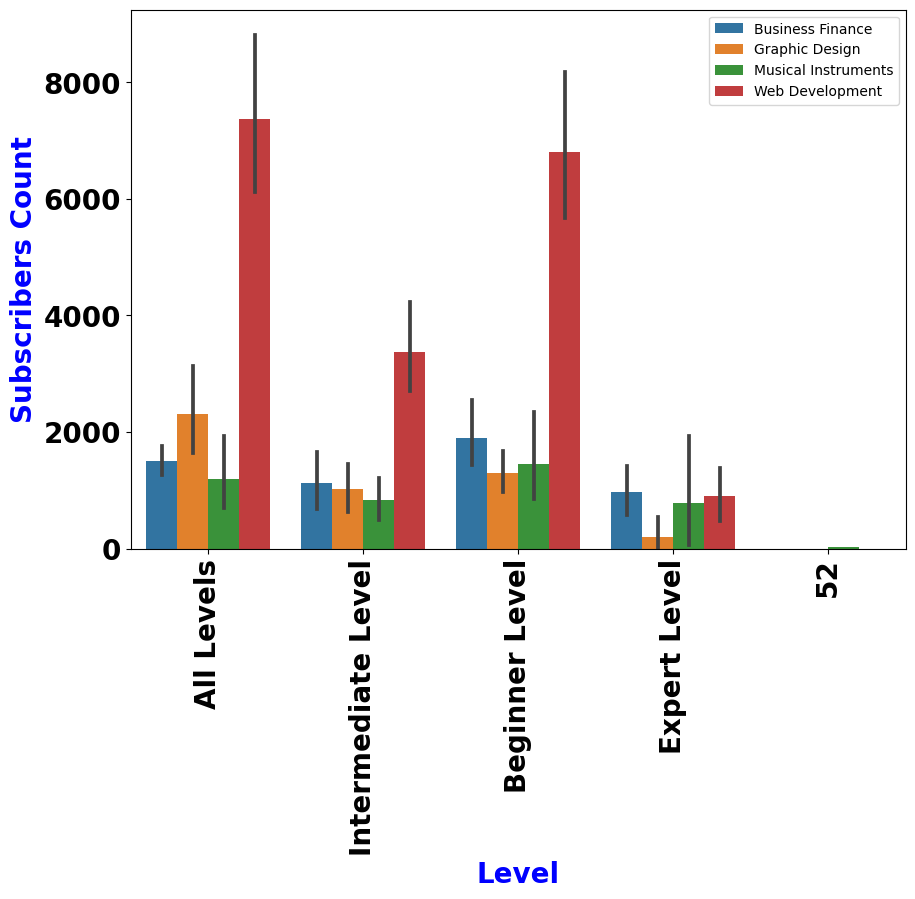

In [16]:
# number of levels an subscribers count
plt.figure(figsize=(10, 7))
sns.barplot(x="level", y="num_subscribers", hue="subject", data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Subscribers Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper right');

In [17]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

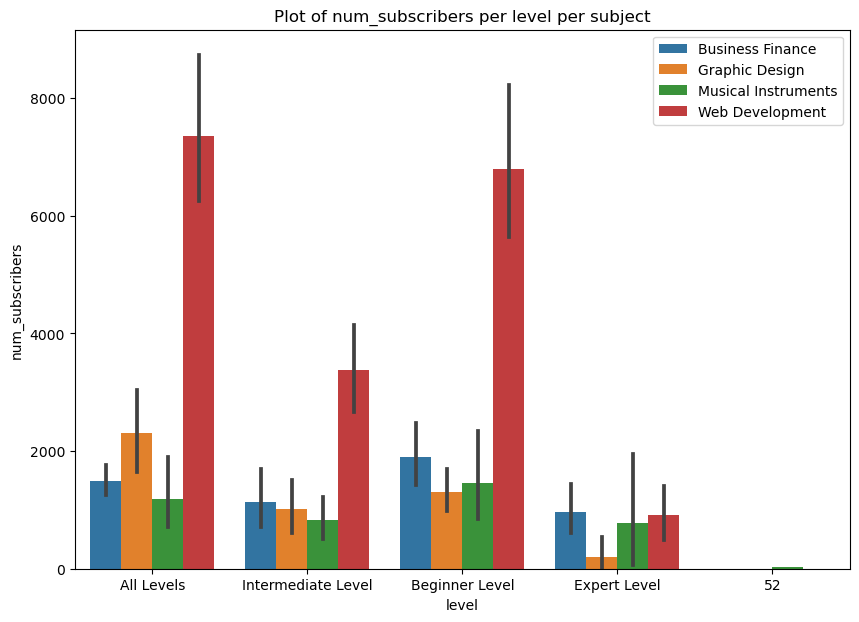

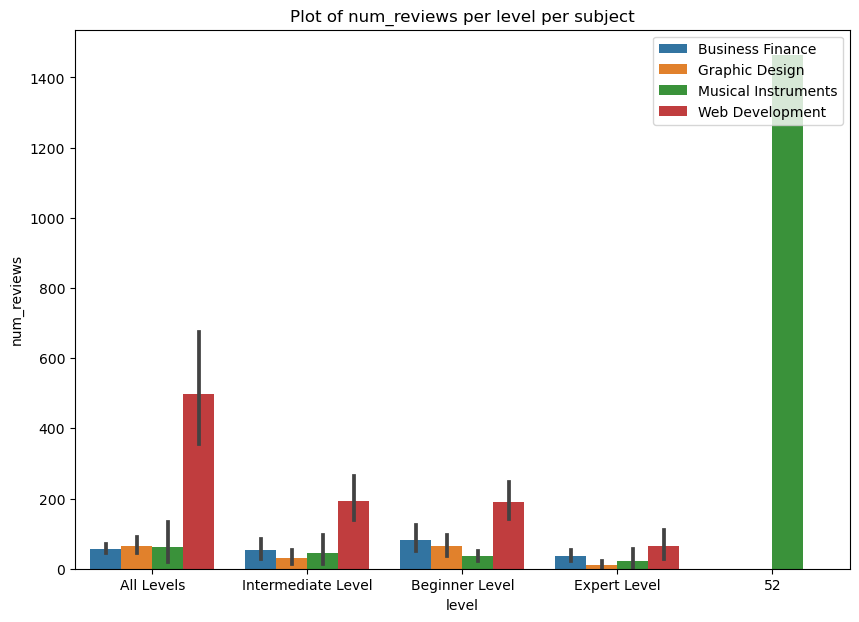

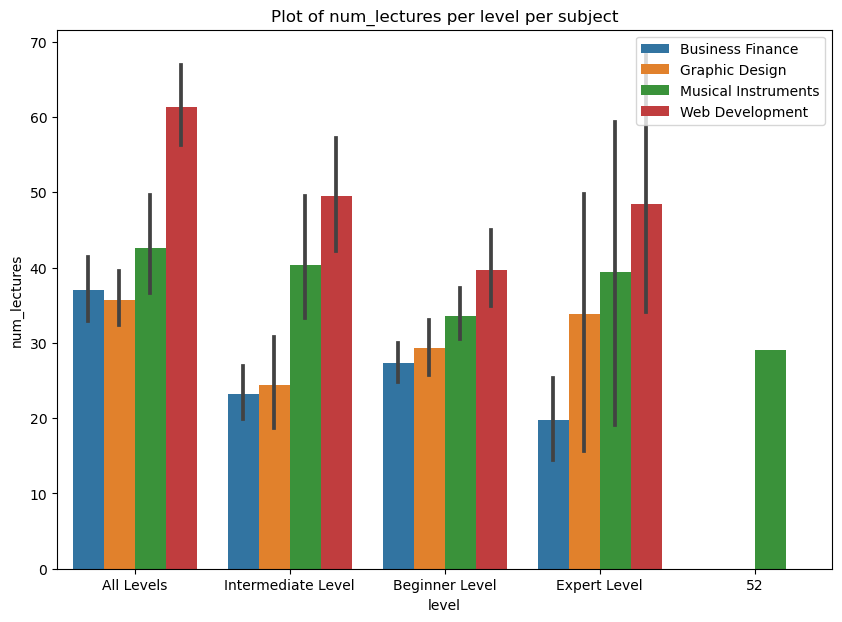

In [18]:
# reviews level plot and lectures level plots

def plot_data(df, feature):
    plt.figure(figsize=(10, 7))
    plt.title(f"Plot of {feature} per level per subject")
    sns.barplot(x="level", y=feature, data=df, hue="subject")
    plt.legend(loc='upper right')
    plt.show()
    
features_list = ['num_subscribers', 'num_reviews', 'num_lectures']

for feature in features_list:
    plot_data(df, feature)

## EDA on Price

* **Price**
    - What is the average price of a course?
    - What is the minimum and maximum price?
    - How much does Udemy earn?
    - The most profitable courses?

In [19]:
# Get the unique prices
df["price"].unique()

array([2.42  , 0.9075, 0.5445, 1.1495, 1.815 , 0.7865, 2.3595, 0.363 ,
       0.242 , 0.605 , 2.1175, 1.694 , 1.3915, 2.299 , 1.5125, 0.726 ,
       1.7545, 1.2705, 1.8755, 2.2385, 2.178 , 1.452 , 0.3025, 1.936 ,
       0.484 , 0.    , 1.21  , 1.089 , 0.4235, 0.968 , 0.847 , 0.6655,
       1.9965, 1.573 , 1.0285, 2.057 , 1.331 , 1.6335])

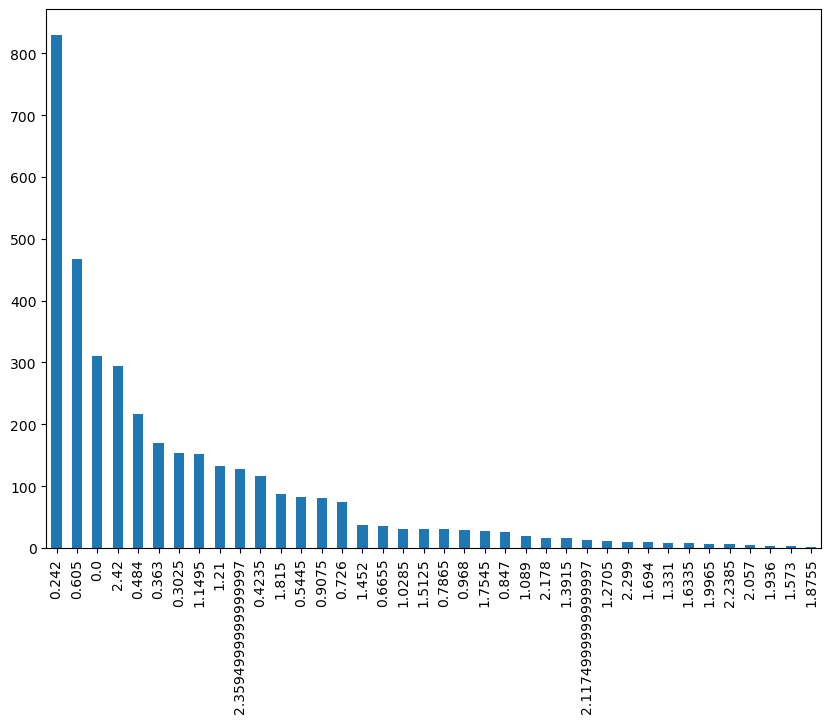

In [20]:
# plot the count plot
plt.figure(figsize=(10, 7))
df["price"].value_counts().plot(kind="bar");

In [21]:
# What is the most profitable cost (price * num_subscribers)

df["profit"] = df["price"] * df["num_subscribers"]
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,2.4200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,5195.740,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,0.9075,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2533.740,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,0.5445,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,1183.743,2016-12-19,19:26:30Z,2016,12,19


In [24]:
# Get the most profitable course
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,2.420000,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,294233.280000,2015-11-02,21:13:27Z,2015,11,2


In [26]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                               2.42
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                         294233.28
published_date                                     

In [28]:
# Least profitable courses
# (free courses with 0 cost price)

df[df["profit"] == df["profit"].min()].style.background_gradient(cmap="plasma")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-basics/,False,0.000000,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0.000000,2017-03-23,22:19:57Z,2017,3,23
105,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-the-stock-market/,False,0.000000,50855,2698,15,Beginner Level,1.5 hours,2013-12-25T19:53:34Z,Business Finance,0.000000,2013-12-25,19:53:34Z,2013,12,25
108,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-trading/,False,0.000000,17160,620,23,All Levels,1 hour,2014-08-29T20:10:38Z,Business Finance,0.000000,2014-08-29,20:10:38Z,2014,8,29
110,923616,Website Investing 101 - Buying & Selling Online Businesses,https://www.udemy.com/cash-flow-website-investing-buy-sell-online-businesses-digital-assets/,False,0.000000,6811,151,51,All Levels,2 hours,2016-08-05T17:03:15Z,Business Finance,0.000000,2016-08-05,17:03:15Z,2016,8,5
114,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-stock-market-beginners/,False,0.000000,19339,794,9,Beginner Level,2 hours,2014-03-31T21:35:06Z,Business Finance,0.000000,2014-03-31,21:35:06Z,2014,3,31
121,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimplemodel/,False,0.000000,29167,1463,8,Intermediate Level,1.5 hours,2014-05-27T16:22:16Z,Business Finance,0.000000,2014-05-27,16:22:16Z,2014,5,27
130,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduction-and-basics-finance-101/,False,0.000000,11724,649,17,Beginner Level,1.5 hours,2016-03-04T05:58:09Z,Business Finance,0.000000,2016-03-04,05:58:09Z,2016,3,4
145,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes-a-brief-introduction/,False,0.000000,56659,4397,16,Beginner Level,1.5 hours,2013-04-07T21:39:25Z,Business Finance,0.000000,2013-04-07,21:39:25Z,2013,4,7
181,1188742,Introduction to Cryptocurrencies and Blockchain,https://www.udemy.com/introduction-to-cryptocurrencies/,False,0.000000,3775,138,11,Beginner Level,2 hours,2017-05-01T21:18:54Z,Business Finance,0.000000,2017-05-01,21:18:54Z,2017,5,1
195,919906,Trading Options For Consistent Returns: Options Basics,https://www.udemy.com/trading-options-for-income/,False,0.000000,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0.000000,2016-08-18,21:57:04Z,2016,8,18


In [30]:
# Average profitable course
df[df["profit"] >= df["profit"].mean()].style.background_gradient(cmap="plasma")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,2.420000,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,5195.740000,2017-01-18,20:58:58Z,2017,1,18
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,2.420000,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,3087.920000,2016-12-13,14:57:18Z,2016,12,13
5,192870,Trading Penny Stocks: A Guide for All Levels In 2017,https://www.udemy.com/trading-penny-stocks-a-guide-for-all-levels/,True,1.815000,9221,138,25,All Levels,3 hours,2014-05-02T15:13:30Z,Business Finance,16736.115000,2014-05-02,15:13:30Z,2014,5,2
7,403100,"Trading Stock Chart Patterns For Immediate, Explosive Gains",https://www.udemy.com/trading-chart-patterns-for-immediate-explosive-gains/,True,1.149500,2917,148,23,All Levels,2.5 hours,2015-01-30T22:13:03Z,Business Finance,3353.091500,2015-01-30,22:13:03Z,2015,1,30
8,476268,Options Trading 3 : Advanced Stock Profit and Success Method,https://www.udemy.com/day-trading-stock-options-3/,True,2.359500,5172,34,38,Expert Level,2.5 hours,2015-05-28T00:14:03Z,Business Finance,12203.334000,2015-05-28,00:14:03Z,2015,5,28
10,592338,Forex Trading Secrets of the Pros With Amazon's AWS,https://www.udemy.com/trading-with-amazons-aws-servers-trade-secrets-of-the-pros/,True,2.420000,4284,93,76,All Levels,5 hours,2015-09-11T16:47:02Z,Business Finance,10367.280000,2015-09-11,16:47:02Z,2015,9,11
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-money-flow/,True,2.420000,1380,42,17,All Levels,1 hour,2016-10-18T22:52:31Z,Business Finance,3339.600000,2016-10-18,22:52:31Z,2016,10,18
13,794151,Forex Trading Course: Work Smarter Not Harder Proven Results,https://www.udemy.com/the-complete-trading-course/,True,2.359500,4061,52,16,All Levels,2 hours,2016-03-16T15:40:19Z,Business Finance,9581.929500,2016-03-16,15:40:19Z,2016,3,16
17,564966,The Complete Chart Pattern Trading Course: A Proven Approach,https://www.udemy.com/make-money-trading-stocks-from-home/,True,2.420000,2666,115,52,All Levels,4 hours,2015-08-10T21:07:35Z,Business Finance,6451.720000,2015-08-10,21:07:35Z,2015,8,10
18,606928,7 Deadly Mistakes of Investing that Will Slash Your Profits!,https://www.udemy.com/7-deadly-mistakes-of-investing/,True,0.605000,5354,24,23,All Levels,1.5 hours,2015-09-21T18:10:34Z,Business Finance,3239.170000,2015-09-21,18:10:34Z,2015,9,21


In [31]:
# How many course on udemy are paid or free
df["is_paid"].unique()

array([ True, False])

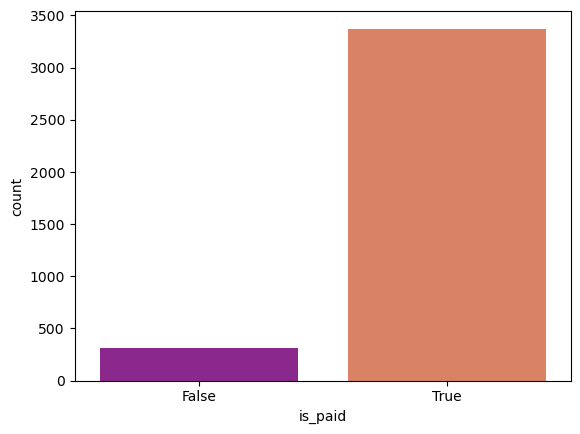

In [32]:
# plot coutnplot of "is_paid" column
sns.countplot(x="is_paid", data=df, palette="plasma");

In [36]:
# groupby is_paid by count subjects
df.groupby(["is_paid"])["subject"].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: subject, dtype: int64

<AxesSubplot: xlabel='is_paid,subject'>

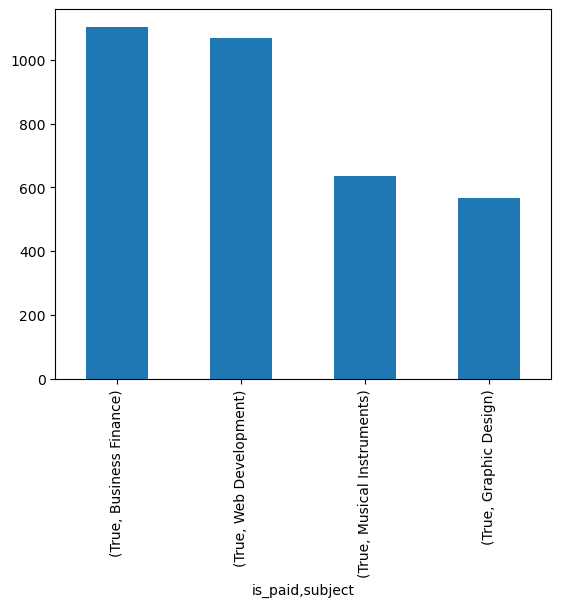

In [40]:
# get paid courses with subjects
df[df["is_paid"]==True].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar');

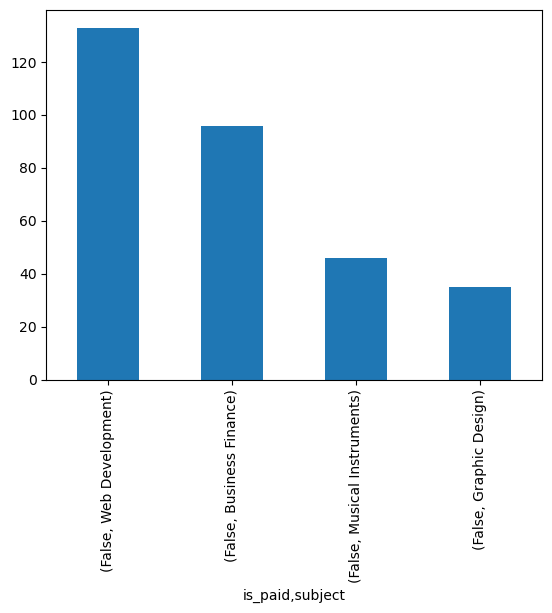

In [41]:
# free courses with subjects

df[df['is_paid']==False].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar');